## Get all the imports here

In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans, AgglomerativeClustering
from tqdm.notebook import tqdm
import joblib
from joblib import Parallel, delayed
import contextlib
np.random.seed(27)
random.seed(27)
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMRegressor
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

from FRUFS import FRUFS
from matplotlib.pyplot import figure

## Load Data

In [2]:
df = pd.read_csv("../data/waveform/waveform.data", header=None)
X, Y = df.drop([21], axis=1).values, df[21].values
num_classes = len(set(Y))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


# Check out the data shapes
print("Train Data Shape:", X_train.shape)
print("Test Data Shape:", X_test.shape)

df.head()

Train Data Shape: (4000, 21)
Test Data Shape: (1000, 21)


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-1.23,-1.56,-1.75,-0.28,0.60,2.22,0.85,0.21,-0.20,0.89,...,2.89,7.75,4.59,3.15,5.12,3.32,1.20,0.24,-0.56,2
1,-0.69,2.43,0.61,2.08,2.30,3.25,5.52,4.55,2.97,2.22,...,1.24,1.89,1.88,-1.34,0.83,1.41,1.78,0.60,2.42,1
2,-0.12,-0.94,1.29,2.59,2.42,3.55,4.94,3.25,1.90,2.07,...,2.50,0.12,1.41,2.78,0.64,0.62,-0.01,-0.79,-0.12,0
3,0.86,0.29,2.19,-0.02,1.13,2.51,2.37,5.45,5.45,4.84,...,2.58,1.40,1.24,1.41,1.07,-1.43,2.84,-1.18,1.12,1
4,1.16,0.37,0.40,-0.59,2.66,1.00,2.69,4.06,5.34,3.53,...,4.30,1.84,1.73,0.21,-0.18,0.13,-0.21,-0.80,-0.68,1


## Grab a baseline score

In [3]:
# We are going to use the K-Means algorithm
model_kmeans = AgglomerativeClustering(n_clusters=num_classes)
preds = model_kmeans.fit_predict(X_train)

# We are going to use the NMI metric to measure the quality/performance of the clustering 
baseline_score = normalized_mutual_info_score(Y_train, preds)
print("Baseline NMI Score:", baseline_score)

Baseline NMI Score: 0.3820361000671423


## Run the unsupervised feature selection method

In [4]:
model = FRUFS(model_r=LGBMRegressor(), k=0.72, n_jobs=-1, verbose=0, random_state=27)
X_train_pruned = model.fit_transform(X_train)
X_test_pruned = model.transform(X_test)

Progress bar: 100%|████████| 21/21 [00:06<00:00,  3.37it/s]


## Check out the performance of the selected features

In [5]:
model_kmeans = AgglomerativeClustering(n_clusters=num_classes)
preds = model_kmeans.fit_predict(X_train_pruned)
print("NMI Score with feature selection", normalized_mutual_info_score(Y_train, preds))

NMI Score with feature selection 0.39673691763610214


## Plot out the feature importances. The blue dashed line indicates the cut-off point you have set.

## Note: You can set K in FRUFS by inspecting the feature importance 

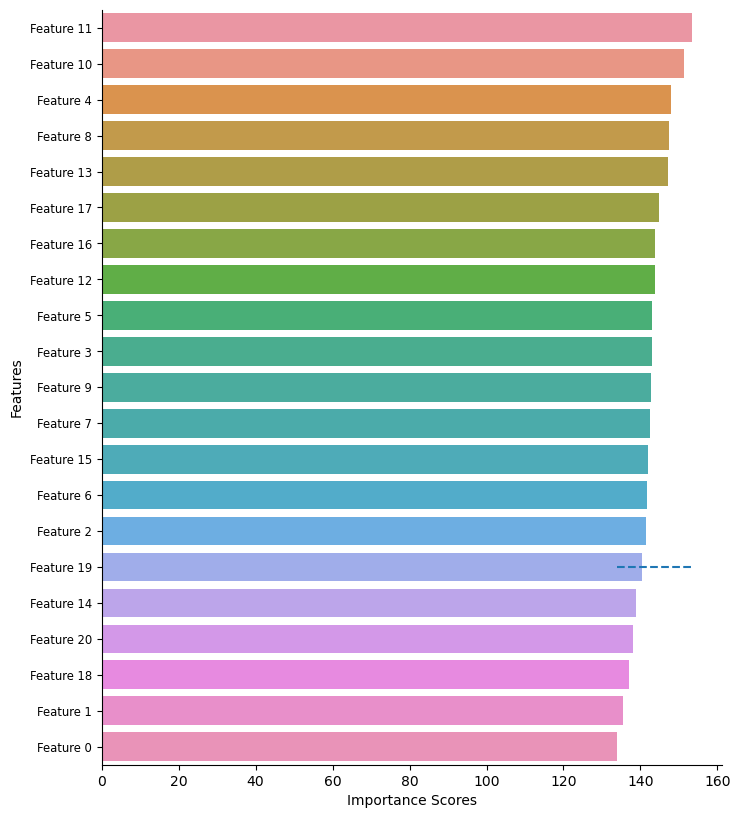

In [6]:
figure(figsize=(8, 10), dpi=100)
model.feature_importance()